In [3]:
import functions
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [50]:
task_n = 'all'

In [51]:
df = functions.file_opener(task = task_n, labeler = 'all')

In [52]:
task = df.task
df = df.drop('task', axis = 1)
#labels = labels.astype(int)

In [53]:
df.shape

(150854, 7)

In [54]:
balanced = pd.DataFrame()
clus = {}
for i in df.label.unique():
    print(float(i))
    balanced = pd.concat([balanced, df.loc[df['label'] == float(i)].sample(min(df.label.value_counts()))])
    clus[int(i)] = 0
    print(clus)

3.0
{3: 0}
2.0
{3: 0, 2: 0}
0.0
{3: 0, 2: 0, 0: 0}
1.0
{3: 0, 2: 0, 0: 0, 1: 0}


In [55]:
df.label.value_counts()

3.0    83025
0.0    43609
2.0    14507
1.0     9713
Name: label, dtype: int64

In [56]:
balanced.label.value_counts()

3.0    9713
2.0    9713
0.0    9713
1.0    9713
Name: label, dtype: int64

In [57]:
labels = balanced.label.to_numpy()
balanced = balanced.drop('label', axis = 1)

In [58]:
balanced = functions.normalize(balanced)

In [59]:
np.unique(labels)

array([0., 1., 2., 3.])

In [2]:
import os

In [4]:
task_n = 'labeler6'
path = './data/feats_lbls/lblr6/'
df = pd.DataFrame()

framesdict = {'2': {'0': 1563, '1': 9999999, '2': 1294, '3': 9999999},\
            '1' : {'0': 999999, '1': 0, '2': 2264, '3': 2441},\
            '4' : {'0' : 999999, '1': 0, '2': 9999999, '3': 9766},\
            '3': {'0': 999999, '1': 0, '2': 3020, '3': 3255}}

for filename in os.listdir(path):
    if filename.startswith('lbls'):
        file_df = pd.read_csv(path+ 'feats' + filename[4:], header = None)
        file_df['label'] = pd.read_csv(path+ 'lbls' + filename[4:], header = None)
        df= pd.concat([df, functions.get_frames(file_df, framesdict[filename[-5]])])

1806 999999
2740 9999999
46 9999999
2754 9999999
0 9999999
6008 9999999
0 9999999
821 999999
2491 999999
2239 9999999
0 9999999
10442 999999
2666 9999999
1292 9999999
0 9999999
733 999999
7667 9999999
0 9999999
5446 9999999
0 9999999
601 999999
896 999999
736 999999


In [5]:
labels = df.label.to_numpy()
df = df.drop('label', axis = 1)
balanced = df.copy()

In [10]:
from matplotlib import pyplot as plt
import csv
cluster_numbers = [10,50,100]
stacked_line = {}
events = np.unique(labels)
predDICT = {10:{},50:{},100:{}}

for event in events:
    clusters = {}

    for cluster_number in cluster_numbers:
        for i in range(0, cluster_number):
            clusters[i] = {0:0, 1:0, 2:0, 3:0}
        perclist = []
        kmeans = KMeans(n_clusters=cluster_number, random_state=0, n_init="auto").fit(balanced)
        predicted = kmeans.labels_
        centroids  = kmeans.cluster_centers_
        
        for i, cluster in enumerate(predicted):
            clusters[cluster][labels[i]] += 1

        for i in clusters:
            #perc = round(100* (max(clusters[i].values())/ sum(clusters[i].values())))
            if (max(clusters[i].values()) > 50):
                fig = plt.bar([0,1,2,3], clusters[i].values(), color='b')
                plt.title("Number of label occurences in cluster %i, task %s, number of clusters %i"%(i,task_n,cluster_number))
                plt.xticks(range(0,4))
                plt.xlabel("Label")
                plt.ylabel("Number of occurences in cluster")
                plt.savefig('./plots/clustering/t_%s/c_%i/cluster_%i.png'%((task_n,cluster_number,i)))
                plt.clf()
            
                perc = round(100* (max(clusters[i].values())/ sum(clusters[i].values())))
                if (max(clusters[i].values()) > 50):
                    perclist.append([i, clusters[i], max(clusters[i], key=clusters[i].get), str(perc)+ '%', centroids[i]])

        with open ('./plots/clustering/t_%s/c_%i/percentages.csv'%((task_n,cluster_number)), 'w') as f:
            write = csv.writer(f)
            write.writerows([['cluster', 'label distribution', 'label', 'label percentage', 'cluster center']])
            write.writerows(perclist)

        dist_dict = {}
        for i, cluster in enumerate(clusters.values()):
            dist_dict[i] = (cluster[event])

        distlist = list(dist_dict.values())

        print(len(distlist))
        #stacked_line[event] = distlist
        predDICT[cluster_number][event] = distlist

        plt.bar(range(0,cluster_number), distlist)
        plt.ylabel("Number of datapoints")
        plt.xlabel("Cluster")
        plt.title('number of labels per cluster, task %s, event %i'%(task_n, event))
        plt.savefig('./plots/clustering/t_%s/c_%i/event_%i'%(task_n, cluster_number, event))
        plt.clf()


10
50
100
10
50
100
10
50
100
10
50
100


<Figure size 640x480 with 0 Axes>

In [21]:
predDict

NameError: name 'predDict' is not defined

In [26]:
from tabulate import tabulate
table = [['cluster', 'label distribution', 'label percentage']]
print('task: %s, clusters: %i'%(task_n,cluster_number))
for i in clusters:
    perc = round(100* (max(clusters[i].values())/ sum(clusters[i].values())))
    if (max(clusters[i].values()) > 50):
        table.append([i, clusters[i], str(perc)+ '%'])
print(tabulate(table, tablefmt='fancy_grid'))

task: 2, clusters: 100
╒═════════╤══════════════════════════════╤══════════════════╕
│ cluster │ label distribution           │ label percentage │
├─────────┼──────────────────────────────┼──────────────────┤
│ 0       │ {0: 0, 1: 0, 2: 140, 3: 245} │ 64%              │
├─────────┼──────────────────────────────┼──────────────────┤
│ 6       │ {0: 0, 1: 0, 2: 847, 3: 842} │ 50%              │
├─────────┼──────────────────────────────┼──────────────────┤
│ 16      │ {0: 0, 1: 0, 2: 579, 3: 769} │ 57%              │
├─────────┼──────────────────────────────┼──────────────────┤
│ 29      │ {0: 0, 1: 0, 2: 603, 3: 833} │ 58%              │
├─────────┼──────────────────────────────┼──────────────────┤
│ 37      │ {0: 0, 1: 0, 2: 289, 3: 561} │ 66%              │
├─────────┼──────────────────────────────┼──────────────────┤
│ 41      │ {0: 0, 1: 0, 2: 372, 3: 87}  │ 81%              │
├─────────┼──────────────────────────────┼──────────────────┤
│ 42      │ {0: 0, 1: 0, 2: 54, 3: 26}   │ 68% 

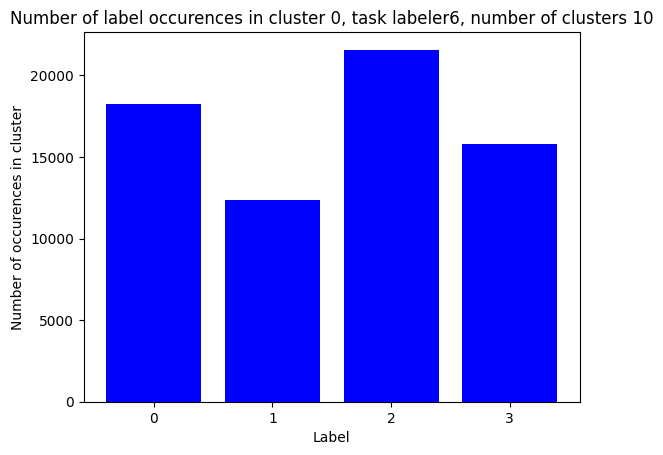

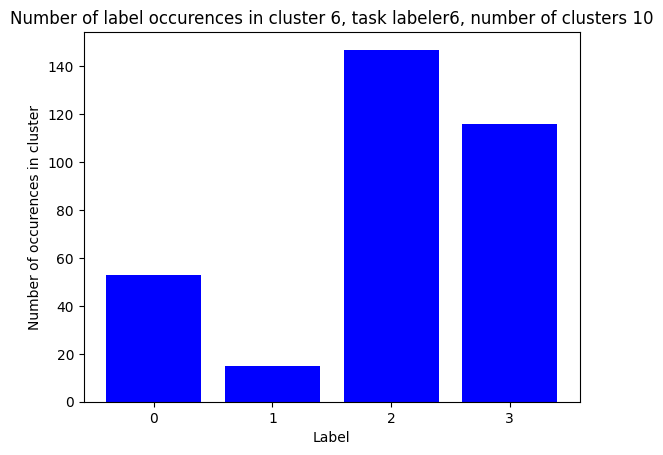

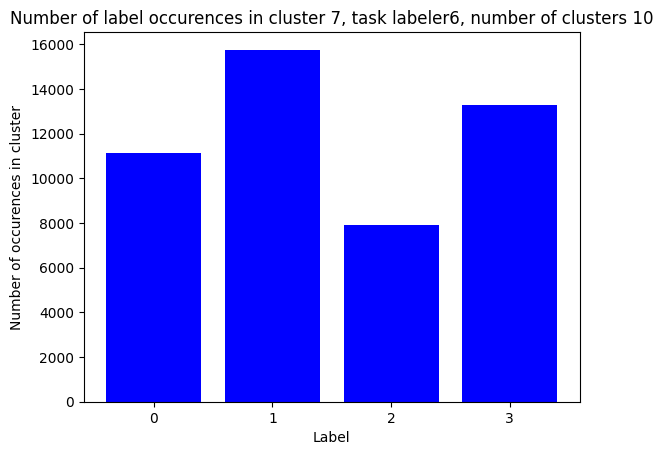

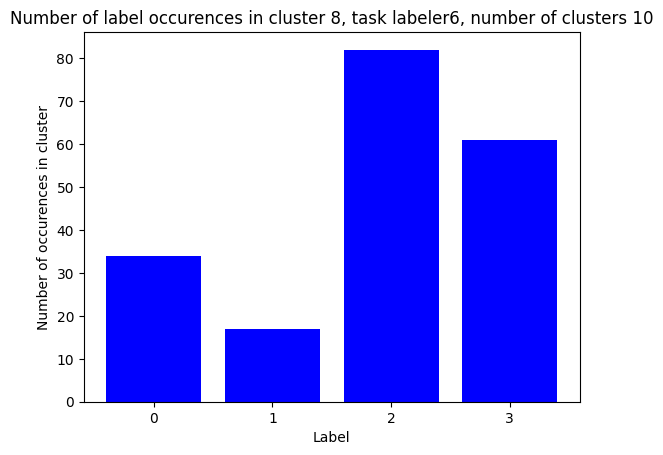

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

for i in clusters:
    #perc = round(100* (max(clusters[i].values())/ sum(clusters[i].values())))
    if (max(clusters[i].values()) > 50):
        fig = plt.bar([0,1,2,3], clusters[i].values(), color='b')
        plt.title("Number of label occurences in cluster %i, task %s, number of clusters %i"%(i,task_n,cluster_number))
        plt.xticks(range(0,4))
        plt.xlabel("Label")
        plt.ylabel("Number of occurences in cluster")
        plt.show()
        plt.clf()


In [20]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df, predicted, metric='euclidean')

In [21]:
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.380


In [22]:
from yellowbrick.cluster import KElbowVisualizer
#
# Instantiate the clustering model and visualizer
#
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(10,100))
 
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/Users/rubenotter/opt/anaconda3/lib/python3.8/site-packages/scikit_learn-1.2.0rc1-py3.8-macosx-11.1-arm64.egg/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rubenotter/opt/anaconda3/lib/python3.8/site-packages/scikit_learn-1.2.0rc1-py3.8-macosx-11.1-arm64.egg/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rubenotter/opt/anaconda3/lib/python3.8/site-packages/scikit_learn-1.2.0rc1-py3.8-macosx-11.1-arm64.egg/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rubenotter/opt/anaconda3/lib/python3.8/site-packages/scikit_learn-1.2.0rc1-py3.8-mac

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 
/Users/rubenotter/opt/anaconda3/lib/python3.8/site-packages/scikit_learn-1.2.0rc1-py3.8-macosx-11.1-arm64.egg/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rubenotter/opt/anaconda3/lib/python3.8/site-packages/scikit_learn-1.2.0rc1-py3.8-macosx-11.1-arm64.egg/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rubenotter/opt/anaconda3/lib/python3.8/site-packages/scikit_learn-1.2.0rc1-py3.8-macosx-11.1-arm64.egg/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will ch

NameError: name 'df' is not defined

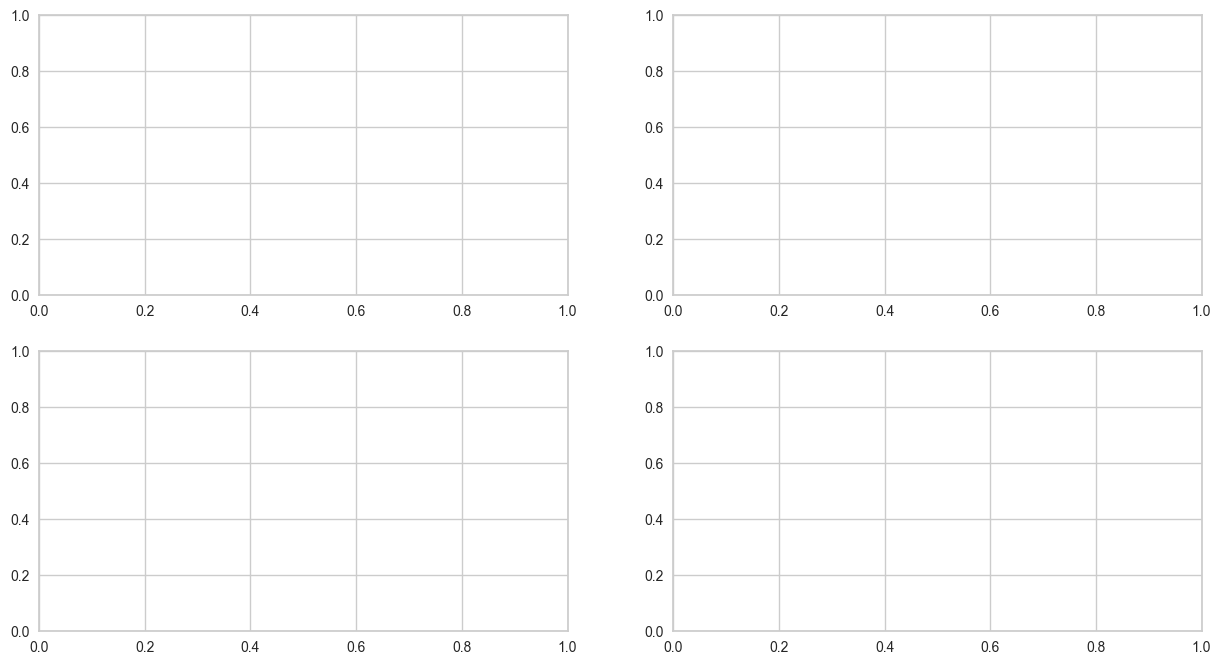

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

a = 0
  
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [5,11,51,101]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    #q, mod = divmod(i, 2)
    
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''

    q = [0,1,0,1]
    mod = [0,0,1,1]


    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q[a]][mod[a]])

    a+=1

    visualizer.fit(df)
    
    

In [ ]:
df.head()

,0,1,2,3,4,5
27880,0.290381,1.074079,0.696093,-0.003009,0.960599,36.788453
18614,0.361478,2.964660,0.033143,0.000111,0.992730,53.850761
14508,0.339216,2.034333,0.012064,-0.000027,0.399134,84.215803
16018,0.399516,0.284522,0.210560,0.000702,1.004804,35.755920
9170,0.056497,-1.704476,0.025865,-0.000173,0.241219,19.362806


For n_clusters = 4 The average silhouette_score is : 0.9539110365624238
For n_clusters = 10 The average silhouette_score is : 0.5049992367528546
For n_clusters = 25 The average silhouette_score is : 0.42328709151641886
For n_clusters = 50 The average silhouette_score is : 0.40296255223031097
For n_clusters = 100 The average silhouette_score is : 0.36687189263596215


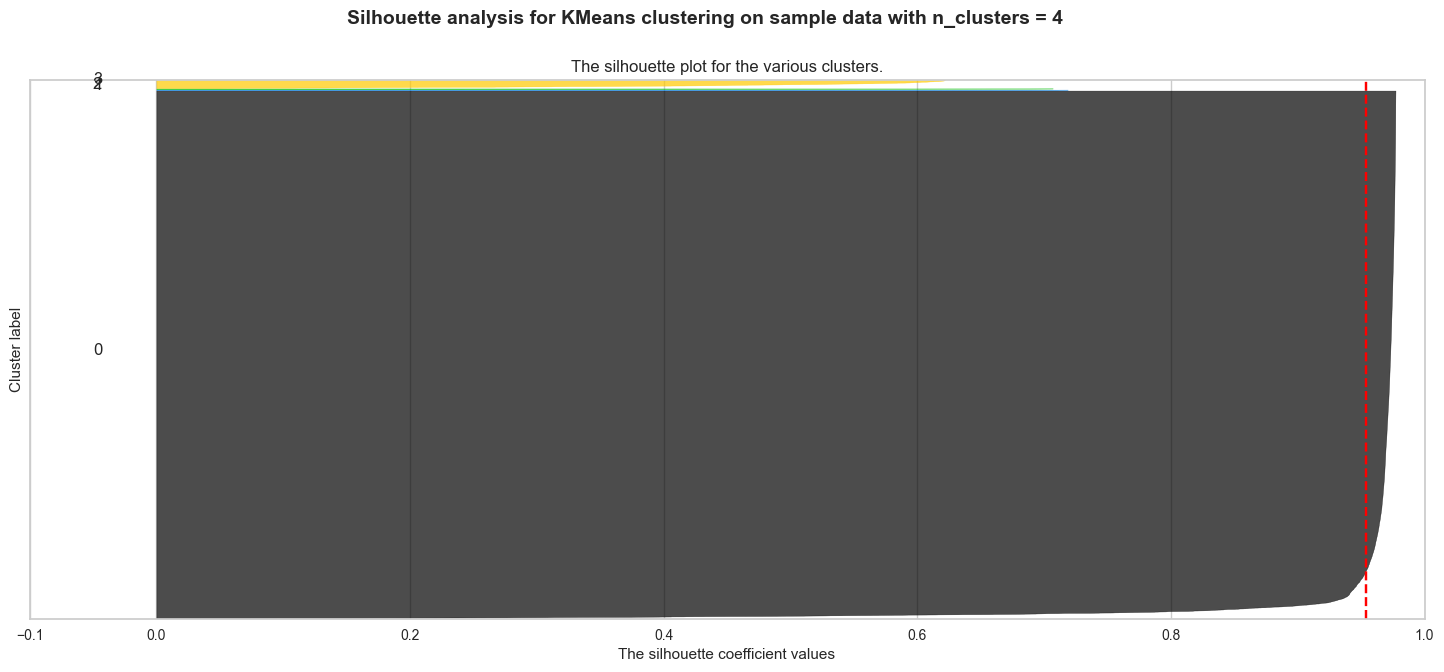

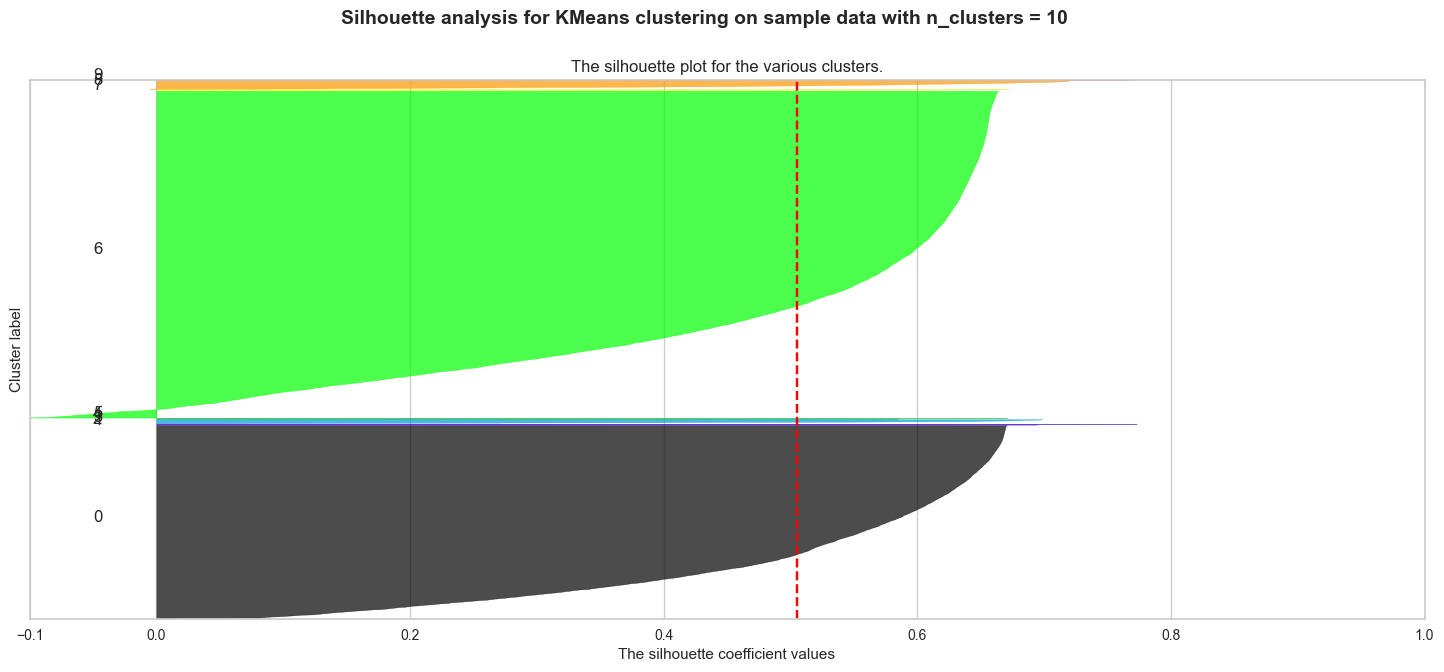

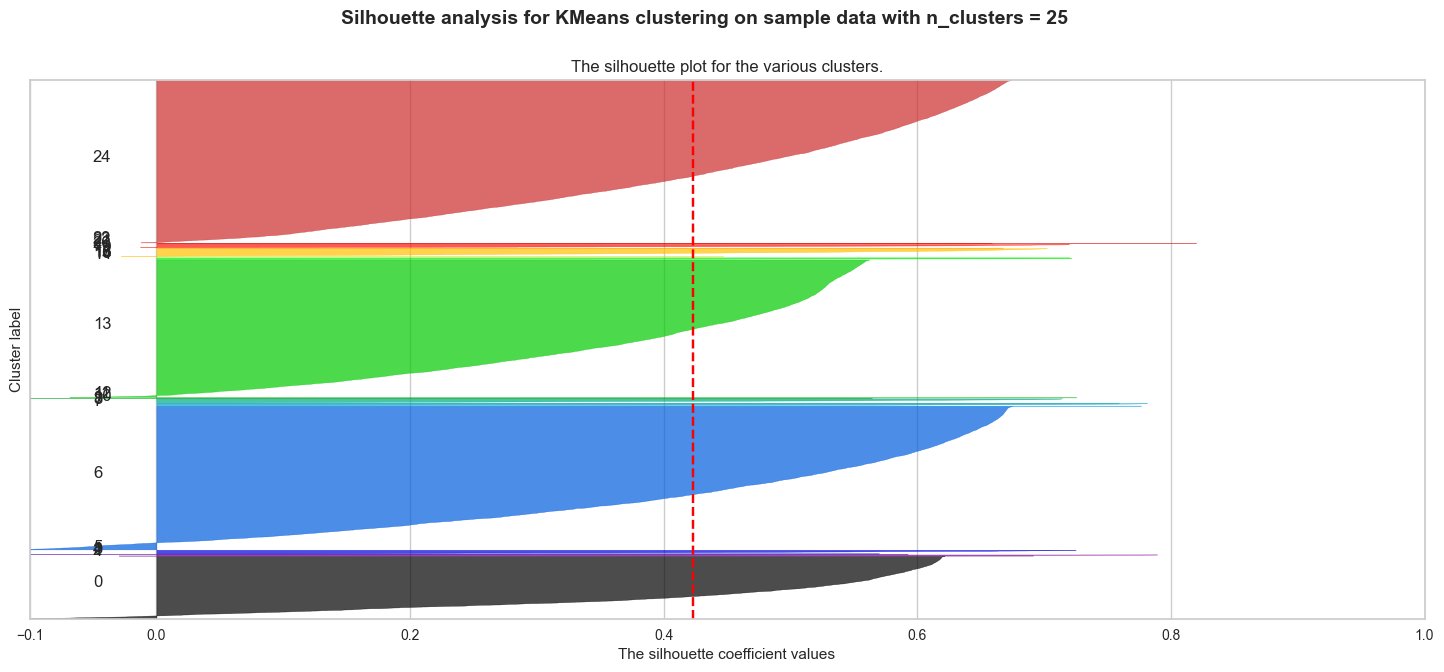

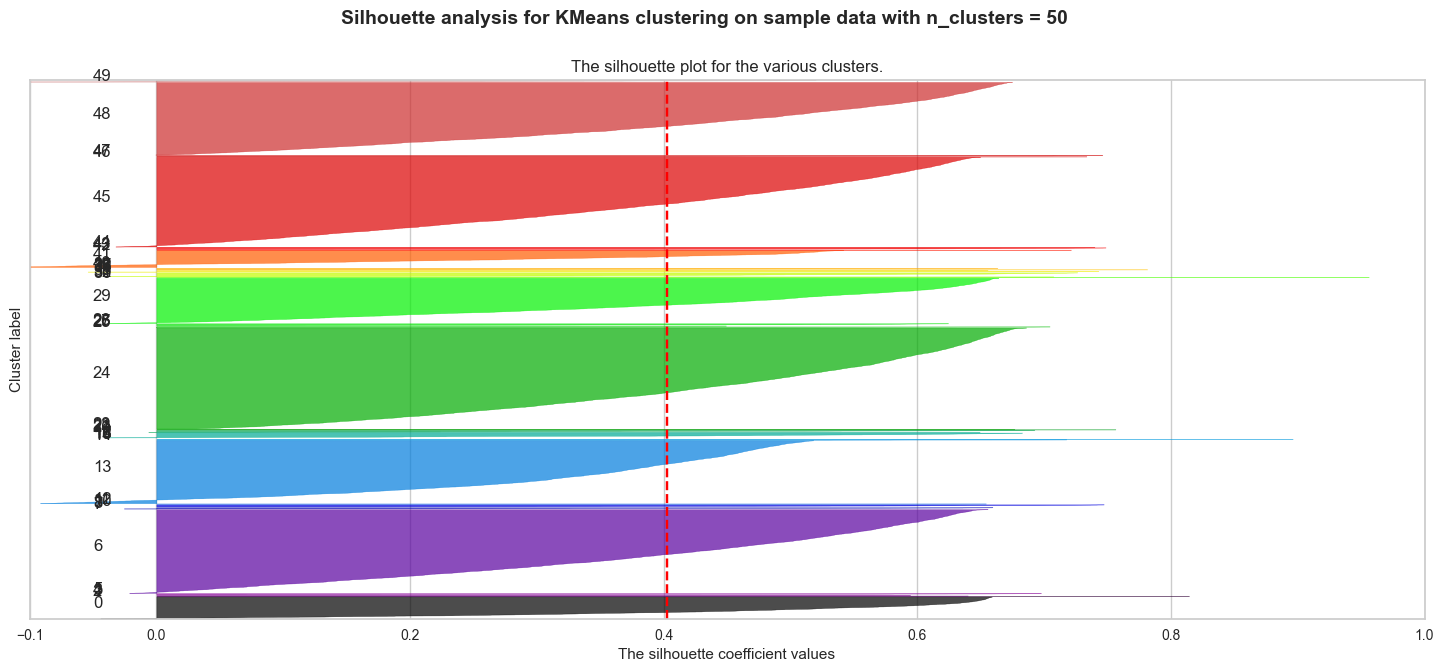

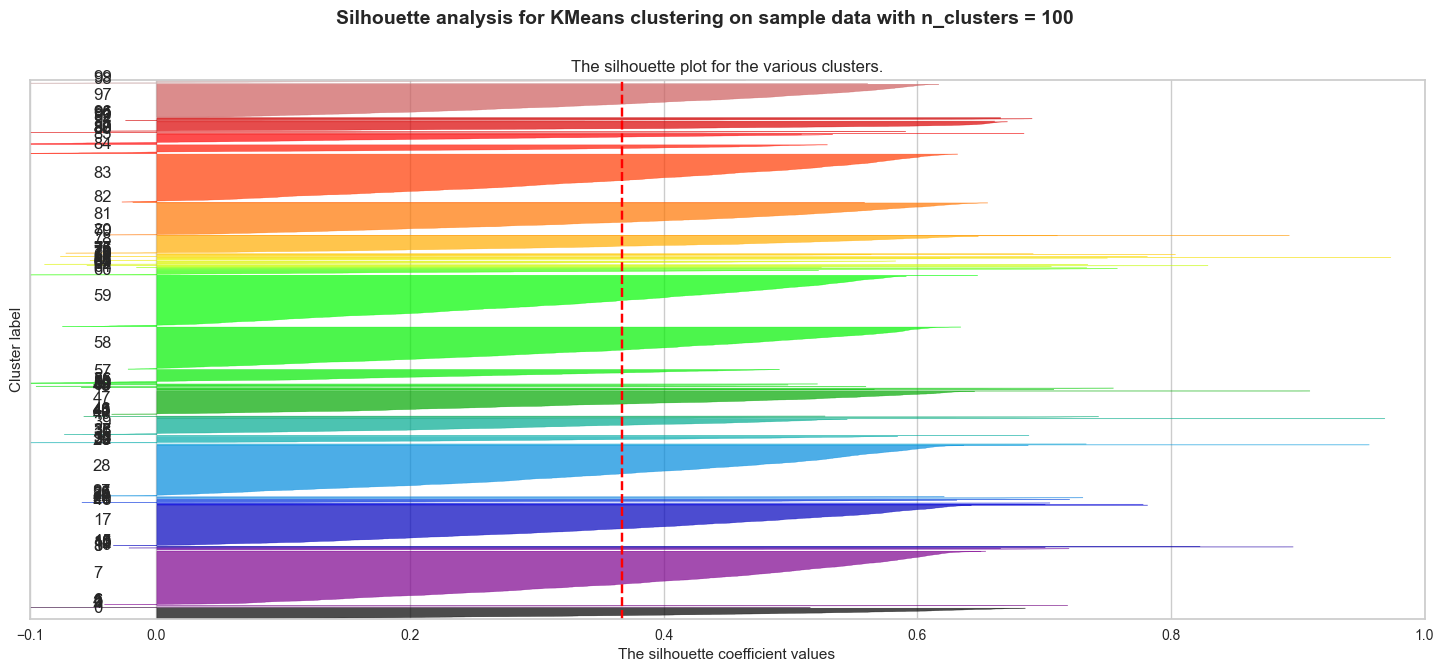

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
X = df.values

range_n_clusters = [4, 10, 25, 50, 100]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

    plt.savefig('./plots/clustering/t_%s/silhouettes_%d'%(task_n,n_clusters))